<a href="https://colab.research.google.com/github/pikey-msc/Python/blob/main/M3/C8_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trading algoritmico

¿Qué son las acciones y divisas? ¿Qué es el trading  con  acciones?

**Acciones**

Una acción es una representación de una participación en la propiedad de una corporación, que se emite a un determinado precio. Es un tipo de garantía financiera que establece su reclamo sobre los activos y el rendimiento de una empresa.

Una organización o empresa emite acciones para recaudar más fondos/capital a fin de ampliar la escala y participar en más proyectos. Estas acciones se ponen a disposición del público y se venden y compran.

**Divisas**

Es la equivalencia monetaria entre dos monedas, está influenciada por términos macroeconómicos y políticos.


**Estrategia de trading y compra de acciones y/o divisas**

El proceso de compra y venta de acciones y/o divisas existentes y previamente emitidas se denomina invertir en acciones y/o divisas. Existe un precio al que se puede comprar y vender una acción y/o divisa, y éste sigue fluctuando dependiendo de la demanda y la oferta en el mercado de valores.


Los inversores  pagan dinero a cambio de la propiedad dentro de una empresa, con la esperanza de hacer algunas transacciones rentables y vender las acciones a un precio más alto.

Otra técnica importante que siguen los inversores es el short selling  o venta en corto. Esto implica que las acciones y/o divisas que toman prestadas se venden inmediatamente con la esperanza de comprarlas más tarde a un precio más bajo, devolverlas al prestamista y obtener el margen.

La mayoría de los inversores siguen un plan y un modelo para invertir. Esto se conoce como una estrategia de inversión.

Los traders cuantitativos de los fondos de cobertura y los bancos de inversión diseñan y desarrollan estas estrategias y marcos operativos para ponerlos a prueba. Se requieren profundos conocimientos de programación y una comprensión de los lenguajes necesarios para elaborar su propia estrategia.

## Extracción

In [4]:
import pandas as pd
!pip install -U yfinance
import yfinance as yf

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 13.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
tickers_list = ['MSFT']

msft_data = yf.download(tickers_list, '2015-01-01', '2022-03-15')
msft_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-08,277.799988,283.959991,270.000000,275.850006,275.850006,48159500
2022-03-09,283.440002,289.600006,280.779999,288.500000,288.500000,35204500
2022-03-10,283.019989,286.600006,280.579987,285.589996,285.589996,30628000
2022-03-11,287.959991,289.510010,279.429993,280.070007,280.070007,27192600
2022-03-14,280.339996,285.399994,275.820007,276.440002,276.440002,30660700


Aquí tenemos los datos de precios de las acciones de Microsoft EOD de los últimos 9 años.

## Análisis  de datos

In [ ]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1812 entries, 2015-01-02 to 2022-03-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1812 non-null   float64
 1   High       1812 non-null   float64
 2   Low        1812 non-null   float64
 3   Close      1812 non-null   float64
 4   Adj Close  1812 non-null   float64
 5   Volume     1812 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.1 KB


Un índice puede ser pensado como una estructura de datos que nos ayuda a modificar o referenciar los datos. Los datos de series temporales son una secuencia de instantáneas de precios tomadas en intervalos de tiempo consecutivos e igualmente espaciados.

En el trading, los datos de precios de las acciones EOD capturan el movimiento de ciertos parámetros sobre una acción, como el precio de la acción, durante un período de tiempo especificado con puntos de datos registrados a intervalos regulares.

**Terminología importante**

Mirando otras columnas, tratemos de entender lo que representa cada columna:

* Open/Close - Captura el precio de apertura/cierre de la acción
* Adj_Open/Adj_Close - Es el precio de apertura/cierre ajustado es el precio de una acción en un día determinado de negociación que ha sido revisado para incluir cualquier distribución de dividendos, divisiones de acciones y otras acciones corporativas que se produjeron en cualquier momento antes de la apertura del día siguiente.
* Volume - registra el número de acciones que se negocian en un día determinado de negociación.
* High/Low -  registra el precio más alto y el más bajo de las acciones durante un día de negociación determinado.

Estas son las columnas importantes en las que nos centraremos en este momento.

Podemos conocer las estadísticas resumidas de los datos, que nos muestran el número de filas, la media, el máximo, las desviaciones estándar, etc.

In [ ]:
msft_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1.812000e+03
mean,129.700640,130.934233,128.398057,129.730022,126.050763,3.018729e+07
std,83.358948,84.186753,82.445246,83.347711,84.564813,1.424263e+07
min,40.340000,40.740002,39.720001,40.290001,35.517471,7.425600e+06
25%,58.177500,58.574999,57.937499,58.157498,53.533078,2.146020e+07
50%,103.205002,104.395000,101.869999,103.005001,99.399677,2.667340e+07
75%,185.444996,187.107498,183.392502,185.352505,182.187328,3.437182e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.691640e+08


### resample

El método de resample de Pandas se utiliza para facilitar el control y la flexibilidad en la conversión de frecuencia de los datos de las series temporales. Podemos especificar los intervalos de tiempo para remuestrear los datos a mensual, trimestral o anual, y realizar la operación requerida sobre ellos.

In [ ]:
print(msft_data.resample('M').mean())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-31   45.639000   46.071000   45.032000   45.514000   40.013423   
2015-02-28   42.996843   43.272632   42.671052   43.078421   38.002137   
2015-03-31   42.140000   42.528182   41.848182   42.131818   37.303591   
2015-04-30   43.071905   43.736667   42.870952   43.466666   38.485468   
2015-05-31   47.587000   47.977000   47.185500   47.530000   42.191903   
...                ...         ...         ...         ...         ...   
2021-11-30  336.031429  338.451432  333.327144  335.870950  334.829260   
2021-12-31  332.796817  336.028183  328.916817  332.807730  332.120997   
2022-01-31  310.813501  314.456999  304.353000  308.742000  308.104927   
2022-02-28  298.576842  302.567368  294.485790  298.729475  298.366849   
2022-03-31  289.002997  292.499002  283.220999  286.628003  286.628003   

                  Volume  
Date      

Esta es una forma interesante de analizar el rendimiento de las acciones en diferentes marcos temporales.

## Calculando los retornos

Un retorno financiero es simplemente el dinero ganado o perdido en una inversión. Un retorno puede ser expresado nominalmente como el cambio en el importe de una inversión a lo largo del tiempo. Se puede calcular como el porcentaje derivado de la relación entre beneficio e inversión.

Tenemos el pct_change a nuestra disposición para este propósito.

A continuación se muestra cómo se pueden calcular los rendimientos:

In [ ]:
import numpy as np

In [ ]:
# assign `Adj Close` to `daily_close`
daily_close = msft_data['Adj Close']

In [ ]:
# returns as fractional change
daily_return = daily_close.pct_change
daily_return

<bound method NDFrame.pct_change of Date
2015-01-02     41.108837
2015-01-05     40.730808
2015-01-06     40.132988
2015-01-07     40.642895
2015-01-08     41.838528
                 ...    
2022-03-08    275.850006
2022-03-09    288.500000
2022-03-10    285.589996
2022-03-11    280.070007
2022-03-14    276.440002
Name: Adj Close, Length: 1812, dtype: float64>

Esto imprimirá los retornos que las acciones han estado generando diariamente. Multiplicando el número por 100 te dará el porcentaje.

La fórmula usada en pct_change es:

Rendimiento = (Precio al t) - (Precio al t-1) / Precio en t-1

Ahora, para calcular los rendimientos mensuales, todo lo que necesitas hacer es:

In [ ]:
mdata = msft_data.resample('M').apply(lambda x: x[-1])
monthly_return = mdata.pct_change

Después de remuestrear los datos a los meses (para los días hábiles), podemos obtener el último día de negociación del mes utilizando la función apply.

apply toma una función y la aplica a todas y cada una de las filas de la serie de Pandas. La función lambda es una función anónima en Python que puede ser definida sin un nombre, y sólo toma expresiones en el siguiente formato:

    Lambda: expression

Por ejemplo, lambda x: x 2 es una función lambda. Aquí, x es el argumento y x 2 es la expresión que se evalúa y devuelve.

## Medias  móviles

El concepto de medias móviles va a construir la base de nuestra primera estrategia de trading basada en el momento.

En el trading, los traders  a menudo tenemos que evaluar las métricas estadísticas continuamente a lo largo de una ventana  de tiempo.

Veamos cómo podemos calcular la media móvil sobre una ventana de 50 días, y deslizar la ventana cada vez un  1 día.

**rolling**

Esta es la función mágica que hace los trucos por nosotros:

In [ ]:
# assigning adjusted closing prices to adj_prices
adj_price = msft_data['Adj Close']

In [ ]:
# calculate the moving average
mav = adj_price.rolling(window=50).mean()

# print the result
print(mav[-10:])

Date
2022-03-01    309.186129
2022-03-02    308.727292
2022-03-03    308.260695
2022-03-04    307.525601
2022-03-07    306.453552
2022-03-08    305.290564
2022-03-09    304.225696
2022-03-10    303.126580
2022-03-11    301.903091
2022-03-14    300.659495
Name: Adj Close, dtype: float64


Verás la media continua en una ventana de 50 días (aprox. 2 meses). Las medias móviles ayudan a suavizar cualquier fluctuación o picos en los datos, y te dan una curva más suave para el rendimiento de la acción.

Podemos trazar y ver la diferencia pero necesitas el matplotlib:

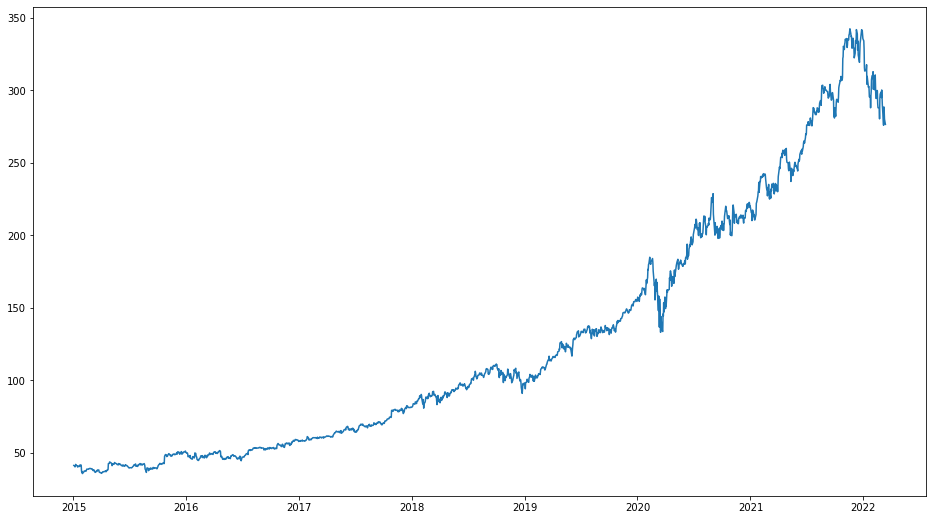

In [ ]:
# importar el paquete matplotlib para ver el gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(adj_price)
plt.show()

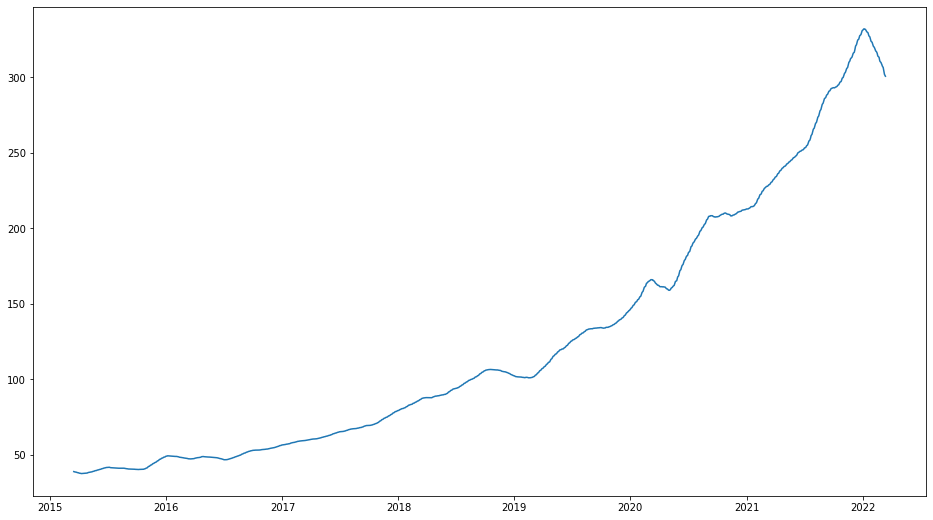

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(mav)
plt.show()

Notemos cómo los picos de los datos se suavizan para dar un sentimiento general sobre el rendimiento de la acción.

## Estrategía (Cruce de EMA's)

Esta será una guía paso a paso para desarrollar una estrategia de cruce de medias móviles simples (SMAC) basada en el momento.

Las estrategias basadas en el momento se basan en un indicador técnico que aprovecha la continuidad de la tendencia del mercado. Compramos valores que muestran una tendencia al alza y vendemos en corto  valores que muestran una tendencia a la baja.

La estrategia SMAC es una estrategia de momento  muy conocida. Es una estrategia de largo plazo. El momento, aquí, es el retorno total de las acciones incluyendo los dividendos de los últimos n meses. Este período de n meses se denomina período de retroceso.

Hay 3 tipos principales de períodos de retroceso: a corto plazo, a medio plazo y a largo plazo. Necesitamos definir 2 períodos de retroceso diferentes de una serie de tiempo en particular.

Se genera una señal de compra cuando la media  de retroceso más corta (o media móvil) supera a la media móvil de retroceso más larga. Una señal de venta se produce cuando la media móvil de retroceso más corta cae por debajo de la media móvil más larga.

Paso 1: Inicializar los períodos de retroceso corto y largo

In [ ]:
short_lb =50
long_lb = 120

paso2: inicializar un nuevo DataFrame llamado signal_df con una columna de señales


In [ ]:
signal_df = pd.DataFrame(index=msft_data.index)
signal_df['signal'] = 0.0

paso3: crear una media móvil simple y corta durante el periodo de observación corto

In [ ]:
signal_df['short_mav'] = msft_data['Adj Close'].rolling(window=short_lb, min_periods=1, center=False).mean()

paso4: crear una media móvil simple y larga durante el largo periodo de observación

In [ ]:
signal_df['long_mav'] = msft_data['Adj Close'].rolling(window=long_lb, min_periods=1, center=False).mean()

paso5: generar las señales basadas en la sentencia condicional

In [ ]:
signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0)   

paso6: crear las órdenes de negociación basadas en la columna de posiciones

In [ ]:
signal_df['positions'] = signal_df['signal'].diff()
print(signal_df)
print(signal_df[signal_df.positions==-1])

            signal   short_mav    long_mav  positions
Date                                                 
2015-01-02     0.0   41.108837   41.108837        NaN
2015-01-05     0.0   40.919823   40.919823        0.0
2015-01-06     0.0   40.657544   40.657544        0.0
2015-01-07     0.0   40.653882   40.653882        0.0
2015-01-08     0.0   40.890811   40.890811        0.0
...            ...         ...         ...        ...
2022-03-08     0.0  305.290564  312.309694        0.0
2022-03-09     0.0  304.225696  312.180245        0.0
2022-03-10     0.0  303.126580  312.070955        0.0
2022-03-11     0.0  301.903091  311.961902        0.0
2022-03-14     0.0  300.659495  311.818449        0.0

[1812 rows x 4 columns]
            signal   short_mav    long_mav  positions
Date                                                 
2015-09-18     0.0   40.342339   40.363426       -1.0
2016-03-21     0.0   47.145967   47.187110       -1.0
2016-06-10     0.0   47.815592   47.843086       -1.0
201

In [ ]:
signal_df[signal_df.positions == 1]

,signal,short_mav,long_mav,positions
Date,,,,
2015-05-19,1.0,38.987065,38.953412,1.0
2015-11-03,1.0,41.409359,41.247811,1.0
2016-04-21,1.0,48.559228,48.485269,1.0
2016-07-29,1.0,47.887663,47.873128,1.0
2019-03-15,1.0,103.940979,103.764478,1.0
2020-05-08,1.0,160.115830,159.937544,1.0


Hemos creado 2 períodos de observación. El período de retroceso corto short_lb es de 50 días, y el período de retroceso más largo para el promedio móvil largo se define como un long_lb de 120 días.

Hemos creado un nuevo DataFrame que está diseñado para capturar las señales. Estas señales se generan siempre que el promedio móvil corto cruza el promedio móvil largo utilizando el np.where. Asigna 1.0 para verdadero y 0.0 si la condición resulta ser falsa.

Las columnas de positions en el DataFrame nos dicen si hay una señal de compra o de venta, o si sigue igual. Básicamente calculamos la diferencia en la columna de señales de la fila anterior usando diff.

### Visualización
Inicializamos una figura del gráfico, añadir los precios de cierre ajustados, las medias móviles cortas y largas al gráfico, y luego trazar las señales de compra y venta utilizando la columna de posiciones en la signal_df anterior:

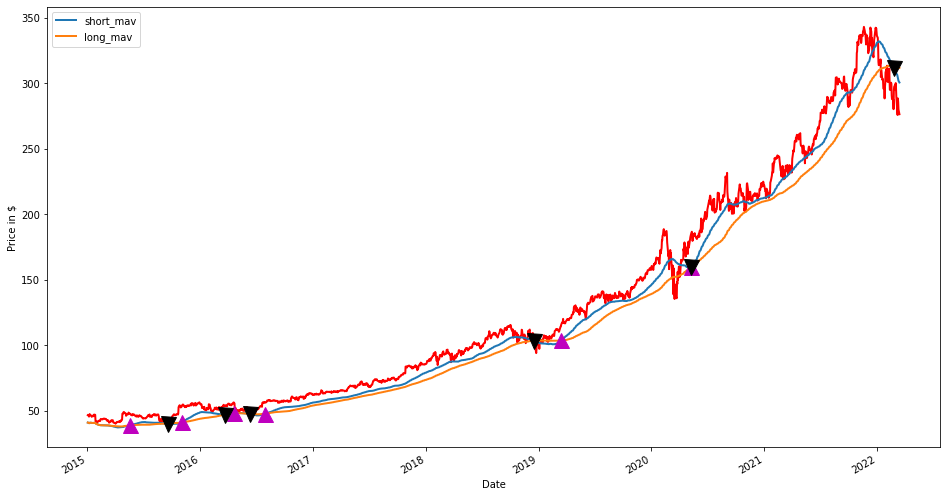

In [ ]:
# Initialize the plot figure
fig = plt.figure(figsize = (16,9))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
msft_data['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signal_df[['short_mav', 'long_mav']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signal_df.loc[signal_df.positions == 1.0].index, 
         signal_df.short_mav[signal_df.positions == 1.0],
         '^', markersize=15, color='m')
         
# Plot the sell signals
ax1.plot(signal_df.loc[signal_df.positions == -1.0].index, 
         signal_df.short_mav[signal_df.positions == -1.0],
         'v', markersize=15, color='k')
         
# Show the plot
plt.show()

## BackTesting

Ahora que tiene su estrategia comercial a la mano, es una buena idea probarla y calcular su rendimiento. Pero justo antes de profundizar en esto, es posible que desee saber un poco más sobre las trampas del backtesting, qué componentes se necesitan en un backtester y qué herramientas de Python puede usar para realizar un backtesting de su algoritmo simple.

**Contras:**
* Eventos externos. Estos pueden ser  cambios en el régimen del mercado,cambios regulatorios o eventos macroeconómicos, que definitivamente influyen en su backtesting. Además, las restricciones de liquidez, como la prohibición de las ventas en corto, podrían afectar en gran medida su backtesting.

* Sobreajuste de un modelo (sesgo de optimización), cuando ignora las reglas de la estrategia porque cree que es mejor así (interferencia), o cuando accidentalmente introduce información en datos anteriores ( sesgo de anticipación).

**Componentes**
* Un manejador de datos, que es una interfaz para un conjunto de datos,
* Una estrategia, que genera una señal para ir en largo o en corto en función de los datos,
* Una cartera, que genera órdenes y gestiona pérdidas y ganancias (también conocido como "PnL"), y
* Un controlador de ejecución, que envía la orden al corredor y recibe los "rellenos" o señales de que la acción ha sido comprada o vendida.

Además de estos cuatro componentes, hay muchos más que puedes agregar a tu backtester, dependiendo de la complejidad. Definitivamente puede ir mucho más allá de estos cuatro componentes. Sin embargo, para efectos de la clase solo se concentrará en hacer que estos componentes básicos funcionen en su código.

****

In [ ]:
# Set the initial capital
initial_capital= float(1000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signal_df.index).fillna(0.0)

# Buy a 100 shares
positions['MSFT'] = 1*signal_df['signal']   

print(positions[positions.MSFT==1])
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(msft_data['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(msft_data['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(msft_data['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.tail())

            MSFT
Date            
2015-05-19   1.0
2015-05-20   1.0
2015-05-21   1.0
2015-05-22   1.0
2015-05-26   1.0
...          ...
2022-02-15   1.0
2022-02-16   1.0
2022-02-17   1.0
2022-02-18   1.0
2022-02-22   1.0

[1555 rows x 1 columns]
            MSFT  holdings         cash        total  returns
Date                                                         
2022-03-08   0.0       0.0  1207.685841  1207.685841      0.0
2022-03-09   0.0       0.0  1207.685841  1207.685841      0.0
2022-03-10   0.0       0.0  1207.685841  1207.685841      0.0
2022-03-11   0.0       0.0  1207.685841  1207.685841      0.0
2022-03-14   0.0       0.0  1207.685841  1207.685841      0.0


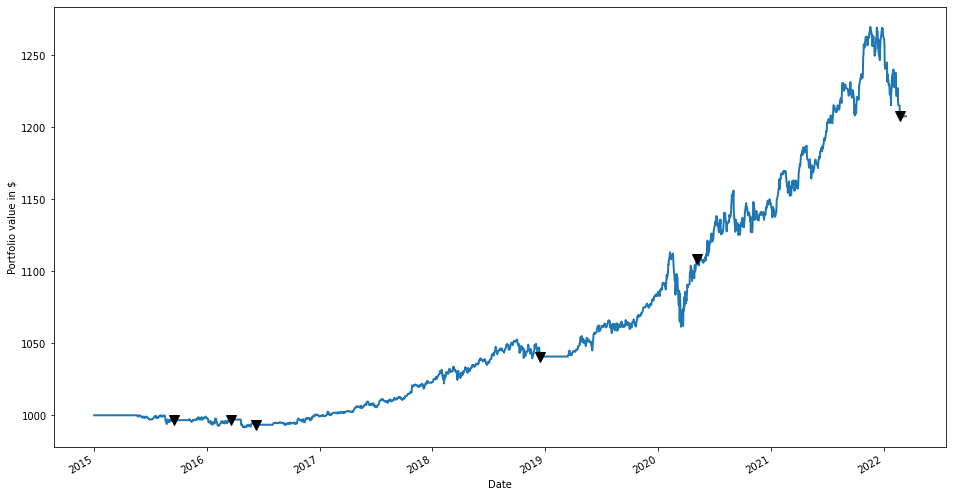

In [ ]:
# Create a figure
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signal_df.positions == 1.0].index, 
         portfolio.total[signal_df.positions == 1.0],
         '^', markersize=0.1, color='m')
ax1.plot(portfolio.loc[signal_df.positions == -1.0].index, 
         portfolio.total[signal_df.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

Es posible que desee mejorar su estrategia. Se pueden usar uno o más algoritmos para mejorar el modelo de forma continua, como KMeans, k-Nearest Neighbors (KNN), árboles de clasificación o regresión y el algoritmo genético.

Otras cosas que puede agregar o hacer de manera diferente es usar un marco de gestión de riesgos o usar pruebas retroactivas basadas en eventos para ayudar a mitigar el sesgo de anticipación.

## Evaluación de estrategía

Puede usar Pandas fácilmente para calcular algunas métricas para juzgar mejor su estrategia comercial simple. En primer lugar, puede utilizar el índice de Sharpe para saber si los rendimientos de su cartera son el resultado del hecho de que decidió realizar inversiones inteligentes o asumir muchos riesgos.x

La situación ideal es, por supuesto, que los rendimientos sean considerables pero que el riesgo adicional de invertir sea el menor posible. Por eso, cuanto mayor sea el ratio de Sharpe de la cartera, mejor: la relación entre la rentabilidad y el riesgo adicional en el que se incurre está bastante bien. Por lo general, los inversores aceptan una relación superior a 1, 2 es muy buena y 3 es excelente.

In [ ]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.7597116433816149


Tenga en cuenta que la tasa libre de riesgo que se excluye en la definición del índice de Sharpe para este tutorial y que el índice de Sharpe generalmente no se considera independiente: generalmente se compara con otras acciones. La mejor manera de abordar este problema es ampliar su estrategia comercial original con más datos (de otras compañías).

A continuación, también puede calcular una reducción máxima, que se utiliza para medir la caída individual más grande desde el punto más alto hasta el más bajo en el valor de una cartera, antes de que se alcance un nuevo punto máximo. En otras palabras, la puntuación indica el riesgo de una cartera elegida en función de una determinada estrategia.

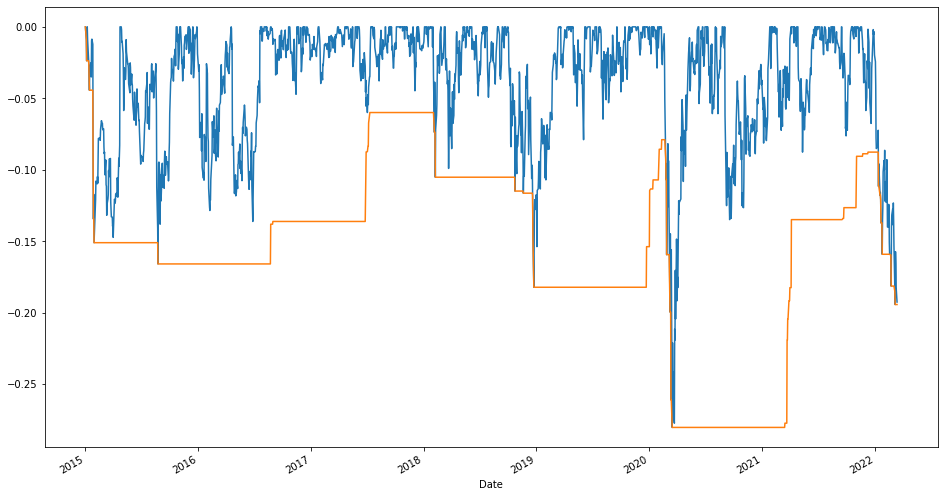

In [ ]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = msft_data['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = msft_data['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
plt.figure(figsize=(16,9))
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

Tenga en cuenta que establece min_periods en 1 porque desea permitir que los datos de los primeros 252 días tengan una ventana de expansión.

El siguiente paso es la tasa de crecimiento anual compuesto (CAGR), que le proporciona una tasa de rendimiento constante durante el período de tiempo. En otras palabras, la tasa le dice lo que realmente tiene al final de su período de inversión. Puede calcular esta tasa dividiendo primero el valor final de la inversión (EV) por el valor inicial de la inversión (BV). Elevas el resultado a la potencia de 1/n, donde n es el número de periodos. ¡Restas 1 del resultado resultante y ahí está tu CAGR!

Tal vez sea más claro así:


$(EV/BV)^{1/n}−1$

Notemos que, se considerarán días, po rlo que 1 es ajustado a 365 días (que es igual a 1 año)


In [ ]:
# Get the number of days in `aapl`
days = (msft_data.index[-1] - msft_data.index[0]).days

# Calculate the CAGR 
cagr = ((((msft_data['Adj Close'][-1]) / msft_data['Adj Close'][1])) ** (365/days)) - 1

# Print the CAGR
print(cagr)

0.30470045508912036


## RSI

La fórmula original de Wilder para calcular el RSI se introdujo paso a paso junto con dos ecuaciones principales; el Índice de Fuerza Relativa (RSI) y la Fuerza Relativa (RS). El RS es una medida proporcional de las ganancias de precio promedio y las pérdidas de precio promedio y el RSI proporciona un valor estandarizado de 0 a 100 para reflejar esa relación. La fórmula para cada uno es la siguiente:

$RS = \frac{Avg.Gain}{Avg.Loss}$

$RSI = 100-\frac{100}{1+RS}$

Calcular el RSI primero requiere el RS, que requiere un valor promedio de n-muchos días de negociación anteriores. Un valor de 14 días es común para el cálculo del RSI; es el valor que usó Wilder y también el que usaremos para nuestros ejemplos aquí. El primer valor de RS requiere el precio de los 14 primeros días de negociación. Esta es una fuente común de confusión con el RSI dado que los valores sucesivos solo requieren el más reciente. Veamos el proceso aquí antes de comenzar a desarrollar nuestro código:



1.   Para 14 períodos, calcule la diferencia de precio del período actual y el período anterior;
2.   Para cada período, registre cada cambio positivo en el precio como una ganancia y cada cambio negativo como una pérdida;
3.   En el período 14, calcule la media aritmética de las ganancias y pérdidas durante todo el período de 14 días (por ejemplo, ganancias / 14 y pérdidas / 14);
4.   Utilice estos valores para calcular el RS
5.   Use el valor RS para calcular el RSI
6.   Para cada período anterior, use solo el valor RSI anterior para calcular el siguiente valor promedio multiplicando por nuestro período retrospectivo: 1 (por ejemplo, 13 para una retrospectiva de 14).
7.   Agregue el valor obtenido en el paso 6 al valor del día actual (haga esto tanto para las ganancias como para las pérdidas)

$TSM_{pi}$ = ($WSM_{pi-1}*(\alpha-1)+p)$ / $\alpha$

Esta ecuación es usada para calcular las ganancias promedio de pérdidas y ganancias después de  después de un número inicial de valores. Las variables están explicadas como sigue:

* WSMpi – El valor promedio actual (para péridida y ganancias) (a.k.a WSA)
* WSMp (i-1) – El promedio del valor previo (a.k.a WSA)
*  $\alpha$ (alpha) – Es el tamaño del periodo que se ve hacia atrás The size of our lookback period
* p –  El periodo medido par aprecios de diferencias

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
import pandas as pd
!pip install pandas_ta
import pandas_ta as ta

Descarga de datos históricos, en este caso BTCUSDT

In [ ]:
data2 = yf.Ticker('MSFT').history(start='2015-01-01', end='2022-03-15')[['Open', 'High', 'Low', 'Close', 'Volume']]

In [ ]:
data2.columns = map(str.lower, data2.columns)

print(data2)

                  open        high         low       close    volume
Date                                                                
2015-01-02   41.020924   41.689073   40.915427   41.108837  27913900
2015-01-05   40.765972   41.082464   40.660475   40.730808  39673900
2015-01-06   40.774764   41.100047   40.036281   40.132988  36447900
2015-01-07   40.423108   40.845098   39.992329   40.642895  29114100
2015-01-08   41.100049   41.979195   41.073676   41.838531  29645200
...                ...         ...         ...         ...       ...
2022-03-08  277.799988  283.959991  270.000000  275.850006  48159500
2022-03-09  283.440002  289.600006  280.779999  288.500000  35204500
2022-03-10  283.019989  286.600006  280.579987  285.589996  30628000
2022-03-11  287.959991  289.510010  279.429993  280.070007  27192600
2022-03-14  280.339996  285.399994  275.820007  276.440002  30660700

[1812 rows x 5 columns]


Generamos el calculo del RSI

In [ ]:
def pandas_rsi(df: pd.DataFrame, window_length: int = 14, output: str = None, price: str = 'Close'):
 
    # Calculate Price Differences using the column specified as price.
    df['diff'] = df['close'].diff(1)

    # Calculate Avg. Gains/Losses
    df['gain'] = df['diff'].clip(lower=0).round(2)
    df['loss'] = df['diff'].clip(upper=0).abs().round(2)

    # Get initial Averages
    df['avg_gain'] = df['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
    df['avg_loss'] = df['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]

    # Calculate Average Gains
    for i, row in enumerate(df['avg_gain'].iloc[window_length+1:]):
        df['avg_gain'].iloc[i + window_length + 1] =\
            (df['avg_gain'].iloc[i + window_length] *
             (window_length - 1) +
             df['gain'].iloc[i + window_length + 1])\
            / window_length

    # Calculate Average Losses
    for i, row in enumerate(df['avg_loss'].iloc[window_length+1:]):
        df['avg_loss'].iloc[i + window_length + 1] =\
            (df['avg_loss'].iloc[i + window_length] *
             (window_length - 1) +
             df['loss'].iloc[i + window_length + 1])\
            / window_length

    # Calculate RS Values
    df['rs'] = df['avg_gain'] / df['avg_loss']

    # Calculate RSI
    df['rsi'] = 100 - (100 / (1.0 + df['rs']))

    # Save if specified
    if output is not None:
        df.to_csv(output)

    return df

Aquí vemos 731 filas de datos OHLC con volumen incluido también. Usando la función pandas RSI que creamos anteriormente, podemos generar todos los datos necesarios para nuestra visualización en una sola línea de código:

In [ ]:
pandas_rsi(df=data2, window_length=14, price='close')
print(data2)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                  open        high         low       close    volume  \
Date                                                                   
2015-01-02   41.020924   41.689073   40.915427   41.108837  27913900   
2015-01-05   40.765972   41.082464   40.660475   40.730808  39673900   
2015-01-06   40.774764   41.100047   40.036281   40.132988  36447900   
2015-01-07   40.423108   40.845098   39.992329   40.642895  29114100   
2015-01-08   41.100049   41.979195   41.073676   41.838531  29645200   
...                ...         ...         ...         ...       ...   
2022-03-08  277.799988  283.959991  270.000000  275.850006  48159500   
2022-03-09  283.440002  289.600006  280.779999  288.500000  35204500   
2022-03-10  283.019989  286.600006  280.579987  285.589996  30628000   
2022-03-11  287.959991  289.510010  279.429993  280.070007  27192600   
2022-03-14  280.339996  285.399994  275.820007  276.440002  30660700   

                 diff   gain  loss  avg_gain  avg_loss        r

Aquí vemos que el valor RSI se ha agregado a nuestro objeto DataFrame. De forma predeterminada, los marcos de datos se muestran en el terminal (o en varios flujos de salida estándar) de forma simplificada. Para ver todas las columnas, podemos usar el comando pandas.set_option('display.max_columns', None). Esto mostrará todas las columnas separadas por saltos de línea cuando sea necesario, de modo que todas las columnas estén visibles. Esto se logra a través del siguiente código:

In [ ]:
# Set option to view all columns
pd.set_option('display.max_columns', None)
# View Result
print(data2)

                  open        high         low       close    volume  \
Date                                                                   
2015-01-02   41.020924   41.689073   40.915427   41.108837  27913900   
2015-01-05   40.765972   41.082464   40.660475   40.730808  39673900   
2015-01-06   40.774764   41.100047   40.036281   40.132988  36447900   
2015-01-07   40.423108   40.845098   39.992329   40.642895  29114100   
2015-01-08   41.100049   41.979195   41.073676   41.838531  29645200   
...                ...         ...         ...         ...       ...   
2022-03-08  277.799988  283.959991  270.000000  275.850006  48159500   
2022-03-09  283.440002  289.600006  280.779999  288.500000  35204500   
2022-03-10  283.019989  286.600006  280.579987  285.589996  30628000   
2022-03-11  287.959991  289.510010  279.429993  280.070007  27192600   
2022-03-14  280.339996  285.399994  275.820007  276.440002  30660700   

                 diff   gain  loss  avg_gain  avg_loss        r

Aquí vemos que todos los pasos intermedios de nuestro cálculo RSI se han agregado a nuestro DataFrame. Esto puede ser útil como una utilidad de depuración en caso de que nuestros valores RSI no aparezcan como se esperaba en nuestra visualización.

### Visualización

Ahora que tenemos nuestros datos cargados y los valores RSI calculados, podemos crear nuestra visualización usando la biblioteca Plotly. Para lograr este objetivo, seguiremos los siguientes pasos:

1. Cree dos subparcelas, una para datos de precios y otra para nuestros datos RSI
2. Cree un gráfico de velas para los datos de precios
3. Cree un gráfico de diagrama de dispersión para los valores RSI
4. Agregar líneas indicadoras para el mínimo/máximo de nuestros valores RSI
5. Agregar líneas indicadoras para los umbrales de sobrecompra/sobreventa
6. Personaliza los colores y el diseño de nuestro gráfico.
7. Vea nuestro gráfico en un navegador web y guarde un archivo de imagen local

Paso 1: Crear dos sublotes
Plotly ofrece a los usuarios un método conveniente para crear múltiples gráficos en visualizaciones individuales. Esta utilidad está disponible a través de la función make_subplots y permite a los desarrolladores especificar el número de filas, columnas e incluso indicar cuándo se deben compartir los ejes (es decir, nuestros valores RSI se representan con los mismos valores de fecha que los precios). Aquí está el código para obtener nuestras subparcelas configuradas:

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create Figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_width=[0.25, 0.75])
# Inspect Result
print(fig)

Figure({
    'data': [],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'matches': 'x2', 'showticklabels': False},
               'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.3625, 1.0]},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.2125]}}
})


Aquí vemos un resumen de los parámetros de nuestro nuevo gráfico. No prestaremos mucha atención a esta información más que para confirmar que tenemos 2 conjuntos de ejes que indican que hemos creado con éxito una fila para nuestros datos de precios y nuestros datos RSI.

Paso 2: cree un gráfico de velas japonesas para datos de precios
El RSI se muestra comúnmente como un gráfico adjunto que se muestra debajo de los datos de precios. Esto permite a los operadores visualizar cómo la acción del mercado indicada por el RSI ha influido en la acción del precio a lo largo del tiempo. Para lograr esto, primero debemos configurar un gráfico para nuestros datos de precios. Crearemos un gráfico de velas utilizando nuestros datos OHLC y el siguiente código:

In [ ]:
# Create Candlestick chart for price data
fig.add_trace(go.Candlestick(
    x=data2.index,
    open=data2['open'],
    high=data2['high'],
    low=data2['low'],
    close=data2['close'],
    increasing_line_color='#ff9900',
    decreasing_line_color='black',
    showlegend=False))

Paso 3: Cree un diagrama de dispersión para el RSI
El siguiente paso es crear un gráfico para nuestro valor RSI. Este será un diagrama de dispersión simple (puntos de datos conectados por una línea) que representan los valores RSI durante las fechas que se muestran en nuestros datos. Aquí especificaremos que el gráfico esté en la parte inferior de nuestra visualización usando el argumento filas=2:

In [ ]:
# Make RSI Plot
fig.add_trace(go.Scatter(
    x=data2.index,
    y=data2['rsi'],
    line=dict(color='#ff9900', width=2),
    showlegend=False,
), row=2, col=1
)

In [ ]:
# MA Cruces
fig.add_trace(go.Scatter(
    x=data2.index,
    y=signal_df['short_mav'],
    line=dict(color='#33A1FF', width=2),
    showlegend=False,
), row=1, col=1
)

fig.add_trace(go.Scatter(
    x=data2.index,
    y=signal_df['long_mav'],
    line=dict(color='#DC43EE', width=2),
    showlegend=False,
), row=1, col=1
)

#Puntos de cruce de emas
# fig.add_trace(go.Scatter(
#     x=signal_df.loc[signal_df.positions == 1.0].index,
#     y=signal_df.short_mav[signal_df.positions == 1.0],
#     line=dict(color='#40A339', width=2),
#     showlegend=False,
# ), row=1, col=1
# )

# fig.add_trace(go.Scatter(
#     x=signal_df.loc[signal_df.positions == -1.0].index,
#     y=signal_df.short_mav[signal_df.positions == -1.0],
#     line=dict(color='#8F1C1C', width=2),
#     showlegend=False,
# ), row=1, col=1
# )


Paso 4: agregue líneas mínimas/máximas para el RSI
El RSI es un valor estandarizado entre 0-100. Es útil tener este rango reflejado en la visualización RSI para garantizar que aparezca como se espera en los gráficos RSI comunes. Esto asegura que podamos ver un RSI escalado consistentemente incluso cuando inspeccionamos diferentes datos. Esto se logra agregando dos líneas horizontales como se ve en el siguiente código:

In [ ]:
# Add upper/lower bounds
fig.update_yaxes(range=[0, 100], row=2, col=1)
fig.add_hline(y=30, col=1, row=2, line_color="#666", line_width=2)
fig.add_hline(y=700, col=1, row=2, line_color="#666", line_width=2)

Paso 6: personalizar y visualizar
En este punto, nuestro gráfico está completamente desarrollado y debería reflejar nuestros datos en consecuencia, lo que significa que es hora de crear la visualización. Plotly ofrece varios métodos para mostrar gráficos, incluida la creación de gráficos HTML interactivos, la exportación a imágenes estáticas como .png o .jpg, o la carga directa a su plataforma empresarial Dash para una solución alojada. Usaremos el método show() para iniciar nuestra visualización en el visor HTML predeterminado del sistema (por ejemplo, Chrome, Firefox, Opera, etc.) con el siguiente código:

In [ ]:
# Add overbought/oversold
fig.add_hline(y=30, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=50, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=70, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')

Después de ejecutar nuestro código, la siguiente visualización debería iniciarse en el visor HTML predeterminado del sistema. Aquí vemos nuestra figura de velas japonesas en la parte superior con el porcentaje de altura especificado de 0,75 y la subtrama RSI debajo ocupando el resto del espacio de figuras asignado:

In [ ]:
# Customize font, colors, hide range slider
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# update and display
fig.update_layout(layout)
fig.show()

Esta visualización nos brinda amplia información relacionada con el precio y la fluctuación del valor RSI durante nuestro período de tiempo. Uno de los muchos beneficios de las funciones HTML de Plotly son los efectos de pasar el mouse que detallan la información por períodos. En el gráfico de velas japonesas, esto se evidencia en la información de OHLC y el gráfico RSI muestra nuestra fecha y valor RSI.

## Trading de pares



In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Generando información simulada

Simularemos dos acciones con una distribución normal

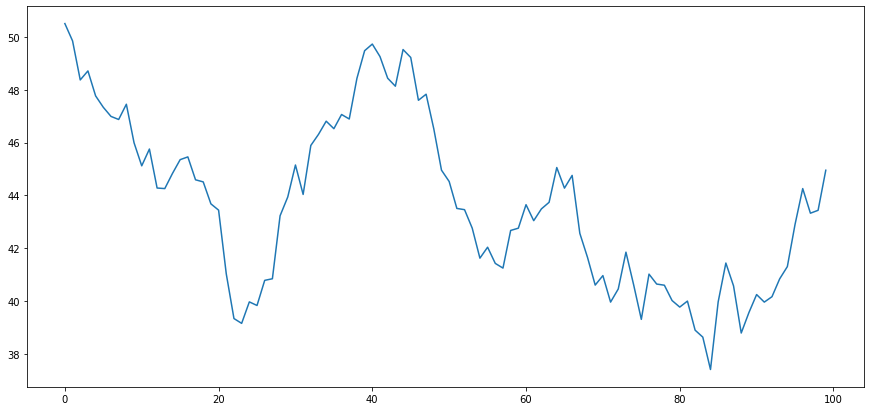

In [9]:
np.random.seed(107) # So that you can get the same random numbers as me

# Generate daily returns
Xreturns = np.random.normal(0, 1, 100)

# sum up and shift the prices up

X = pd.Series(np.cumsum(
    Xreturns), name='X') + 50
X.plot(figsize=(15,7))
plt.show()


Generaremos una $Y$ con una relación directa con $X$ con un poco más de ruido.

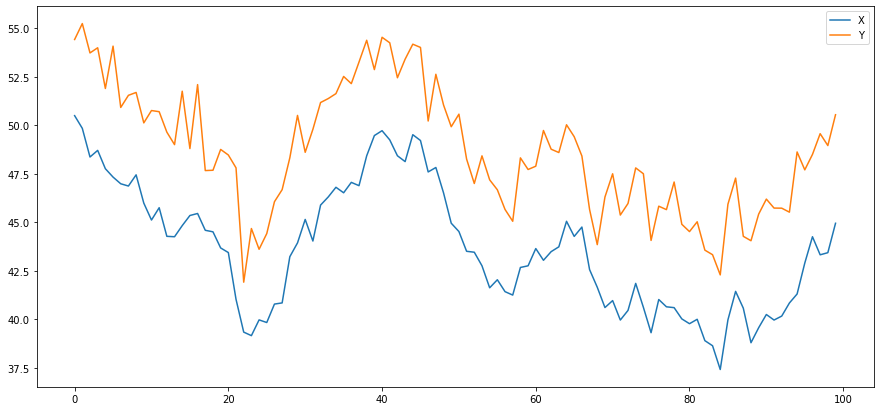

In [10]:

noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'

pd.concat([X, Y], axis=1).plot(figsize=(15, 7))

plt.show()


### Ilustración de la Cointegración

Cointegración NO es lo mismo que la correlación, son diferentes. 
La Cointegración significa que el cociente entre dos series varía alrededor de una media. Entonces una combinación lineal sería:
$$Y=\alpha X + e$$
una serie de tiempo estacionaria. 

Una serie de tiempo estacionaria es cuando la serie varía alrededor de una media y su varianza también varía alrededor de una constante.
Lo que nos interesa es que un par de series no se estén alejando mucho una de la otra.



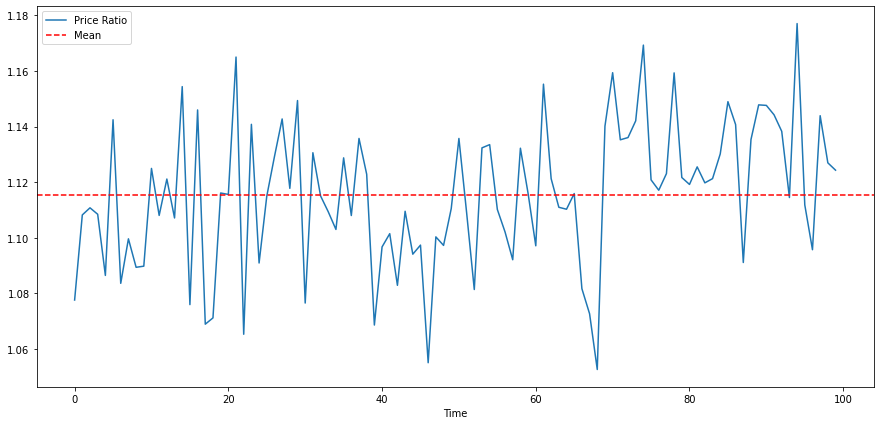

In [11]:
(Y/X).plot(figsize=(15,7))

plt.axhline((Y/X).mean(), color='red', linestyle='--')

plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.show()



En esta gráfica el cociente entre las dos series. Noten como tiende a regresar a su media. Ese es un claro signo de cointegración.

## Prueba de cointegración
Usaremos la librería statsmodels, que tiene una prueba buena de cointegración que obtiene el t-score y el p-value. 
Buscaremos una valor bajo del p-value, idealmente menor que el 5%, para darnos un claro indicador que el par de acciones son muy probables a ser cointegradas.


In [12]:

score, pvalue, _ = coint(X,Y)
print(pvalue)


2.0503418653415035e-16



¡Menor valor del pvalue significa mayor cointegración!

En caso de que exista duda entre correlación e integración acá hay una muestra de la diferencia


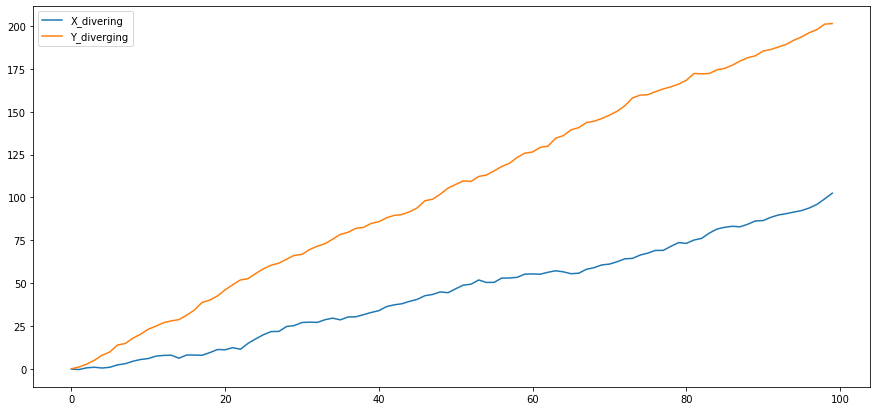

Correlation: 0.9931343801275687
Cointegration test p-value: 0.881555767469521


In [13]:


ret1 = np.random.normal(1, 1, 100)
ret2 = np.random.normal(2, 1, 100)

s1 = pd.Series(np.cumsum(ret1), name='X_divering')
s2 = pd.Series(np.cumsum(ret2), name='Y_diverging')

pd.concat([s1, s2], axis=1).plot(figsize=(15, 7))
plt.show()

print('Correlation: ' + str(s1.corr(s2)))
score, pvalue, _ = coint(s1, s2)
print('Cointegration test p-value: ' + str(pvalue))

Este es un claro ejemplo de dos series con alta correlación pero baja cointegración, veamos lo contrario.

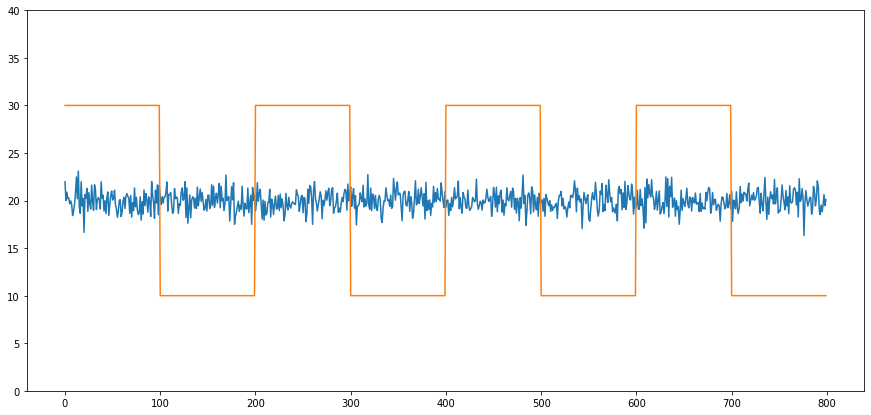

Correlation: -0.05417844733916934
Cointegration test p-value: 0.0


In [14]:

Y2 = pd.Series(np.random.normal(0, 1, 800), name='Y2') + 20
Y3 = Y2.copy()

Y3[0:100] = 30
Y3[100:200] = 10
Y3[200:300] = 30
Y3[300:400] = 10
Y3[400:500] = 30
Y3[500:600] = 10
Y3[600:700] = 30
Y3[700:800] = 10

Y2.plot(figsize=(15,7))
Y3.plot()
plt.ylim([0,40])
plt.show()

# very low correlation
print('Correlation: ' + str(Y2.corr(Y3)))
score, pvalue, _ = coint(Y2, Y3)
print('Cointegration test p-value: ' + str(pvalue))


## Cómo hacer una transacción de pares 
Sabemos que si dos series están cointegradas no se apartarán de la media. Podemos estar confiados que si una serie empieza a diverger eventualmente convergerá en algún momento.

Cuando una serie diverge de la otra, decimos que el *spread* es alto. 

Cuando la desviación es acercándose, decimos que el *spread* es bajo.

En ese caso necesitamos comprar una acción e ir corto en la otra.

¿Pero cuáles? 

Recordemos la ecuación:
$$Y = αX + e$$
Dado que el cociente ($Y/X$) se mueve alrededor de la media $\alpha$, observamos que cuando $X$ y $Y$ están muy apartadas, que es cuando $\alpha$ está o muy grande o muy pequeño. Cuando el cociente de las series se acerca de nuevo podemos hacer dinero.

En general, vamos **largos en la acción que está teniendo problemas o bajando su precio** y **cortos en la acción que está subiendo o mejorando su precio**

En términos de la ecuación, cuando $\alpha$ es más pequeña que lo usual, significa que $Y$ está bajando y $X$ subiendo, entonces compramos $Y$ y vendemos $X$.

Cuando $\alpha$ es más grande de lo normal, vendemos $Y$ y compramos $X$.



### Prueba en datos históricos

Encontremos acciones actuales que estén cointegrados basados en sus valores históricos

In [3]:

def find_cointegrated_pairs(data):
  n = data.shape[1]
  score_matrix = np.zeros((n, n))
  pvalue_matrix = np.ones((n, n))
  keys = data.keys()
  pairs = [] # We store the stock pairs that are likely to be cointegrated
  for i in range(n):
    for j in range(i+1, n):
      S1 = data[keys[i]]
      S2 = data[keys[j]]
      result = coint(S1, S2)
      score = result[0] # t-score
      pvalue = result[1]
      score_matrix[i,j] = score
      pvalue_matrix[i, j] = pvalue
      if pvalue < 0.02:
        pairs.append((keys[i], keys[j]))
  return score_matrix, pvalue_matrix, pairs

Para enriquecer nuestras posibilidades de obtener valores históricos usaremos otras fuentes además de yahoo.


In [2]:
import os
os.chdir('/content')

!git clone 'https://github.com/WillKoehrsen/Data-Analysis.git'

os.chdir('./Data-Analysis/stocker')


Cloning into 'Data-Analysis'...
remote: Enumerating objects: 3097, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 3097 (delta 18), reused 11 (delta 5), pack-reused 3033
Receiving objects: 100% (3097/3097), 368.35 MiB | 23.67 MiB/s, done.
Resolving deltas: 100% (1200/1200), done.
Checking out files: 100% (910/910), done.


In [54]:
tickers_list = ['BIMBOA.MX', 'CEMEXCPO.MX', 'GMEXICOB.MX', 'GCARSOA1.MX',  'GFNORTEO.MX',  'TLEVISACPO.MX', 'GENTERA.MX','^MXX']

df = yf.download(tickers_list, '2012-01-03', '2022-03-17')
df.head(5)

all_prices=df['Adj Close'].dropna()

all_prices.head(5)



[*********************100%***********************]  8 of 8 completed


,BIMBOA.MX,CEMEXCPO.MX,GCARSOA1.MX,GENTERA.MX,GFNORTEO.MX,GMEXICOB.MX,TLEVISACPO.MX,^MXX
Date,,,,,,,,
2012-01-03,26.600809,5.862441,28.205433,13.249207,34.596867,25.561522,55.408535,37384.339844
2012-01-04,26.921635,5.970291,29.143381,12.888067,34.517323,25.390644,55.732342,37387.628906
2012-01-05,26.784136,5.862441,29.260622,12.579597,34.994534,25.192442,55.713295,37017.949219
2012-01-09,26.399151,5.623629,29.369492,12.113132,36.457932,25.288120,55.237114,36785.339844
2012-01-10,26.628307,5.662147,29.294113,12.173321,37.102146,25.903250,55.951382,37190.898438


Ya que están los datos, encontremos pares cointegrados.

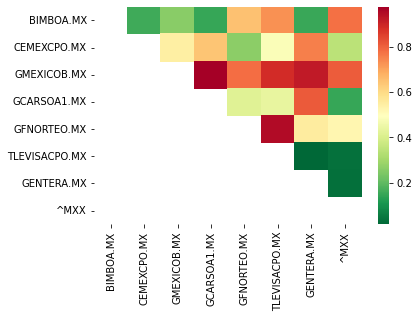

[]
[[0.         0.16115305 0.26123015 0.15203437 0.65245186 0.73092105
  0.15389794 0.7787445 ]
 [0.         0.         0.54606305 0.64513189 0.26669991 0.48368012
  0.75630432 0.34396795]
 [0.         0.         0.         0.97592575 0.78489306 0.88978469
  0.92138786 0.80963411]
 [0.         0.         0.         0.         0.41871668 0.43818912
  0.81239847 0.14936221]
 [0.         0.         0.         0.         0.         0.95043294
  0.55307397 0.5243496 ]
 [0.         0.         0.         0.         0.         0.
  0.01735188 0.03666126]
 [0.         0.         0.         0.         0.         0.
  0.         0.03422423]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [65]:
# Creating a heatmap to show the p-values of the cointegration test


scores, pvalues, pairs = find_cointegrated_pairs(all_prices)
import seaborn
m = [0, 0.2, 0.4, 0.6, 0.8, 1]
seaborn.heatmap(1-pvalues, xticklabels=tickers_list, yticklabels=tickers_list, cmap='RdYlGn_r',
mask = (pvalues >= 0.99))
plt.show()

print(pairs)
print(1-pvalues)

De acuerdo al mapa de calor  donde se grafican los p-values, para todos los pares, obtenemos 4 pares que parecen ser cointegrados. 

Grafiquemos los cocientes para ver qué está pasando.

0.738769849423637


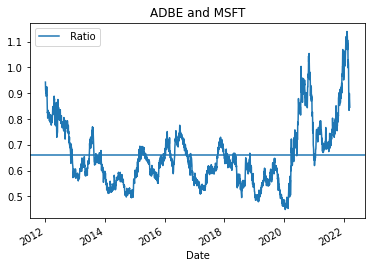

In [61]:
S1 = all_prices['BIMBOA.MX']
S2 = all_prices['GCARSOA1.MX']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot()
plt.axhline(ratios.mean())
plt.title('ADBE and MSFT')
plt.legend([' Ratio'])
plt.show()

0.8388469495145072


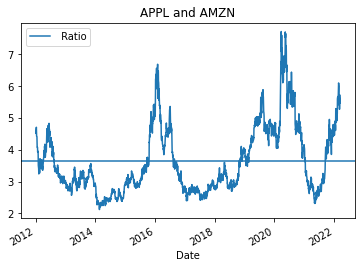

In [63]:

S3 = all_prices['BIMBOA.MX']
S4 = all_prices['CEMEXCPO.MX']
score, pvalue, _ = coint(S3, S4)
print(pvalue)
ratios = S3 / S4
ratios.plot()

plt.axhline(ratios.mean())
plt.title('APPL and AMZN')
plt.legend([' Ratio'])
plt.show()
am_ratios = S1 / S2

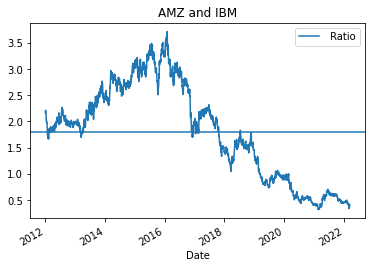

In [69]:

S5 = all_prices['TLEVISACPO.MX']
S6 = all_prices['GMEXICOB.MX']

ratios = S5 / S6
ratios.plot()

plt.axhline(ratios.mean())
plt.title('AMZ and IBM')
plt.legend([' Ratio'])
plt.show()

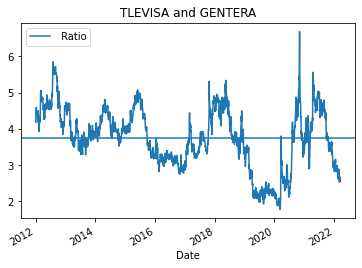

In [70]:


S7 = all_prices['TLEVISACPO.MX']
S8 = all_prices['GENTERA.MX']


ratios = S7 / S8
ratios.plot()
plt.axhline(ratios.mean())
plt.title('TLEVISA and GENTERA')
plt.legend([' Ratio'])
plt.show()


Aparentemente el primer par, Adobe y Microsoft, se ve estable. Tomemos este par.

Estandarizaremos los cocientes porque el ratio absoluto puede no ser el más ideal, usaremos los **z-scores**.



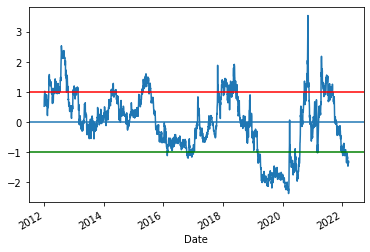

In [72]:

def zscore(series):
  return (series - series.mean()) / np.std(series)

zscore(ratios).plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()


Vemos que no muchas partes divergen de las líneas verdes y rojas

### Señales de *trading*

Como hemos visto, ¿Cuál es el mejor indicador de venta y compra?
Si creamos una variables indicadora

*Y=Ratio es compra (1) o vende (-1)*

*Y(t)=Sign(Ratio(t+1))-Ratio(t))*

Justo la parte interesante de las señales es que no necesitamos saber a dónde van los precios, lo que necesitamos saber si van arriba o abajo.


### Train Test Separación

Tomaremos un 70/30 para entrenamiento y prueba. (14-15 años de entrenamiento y 7 de prueba)

In [75]:
ratios = all_prices['TLEVISACPO.MX'] / all_prices['GENTERA.MX']
print(len(ratios))

train = ratios[:2019]
test = ratios[2019:]

2559


### Ingeniería de Características

Encontraremos qué características son importantes en la dirección que el cociente se mueve.
Coniciendo los cocientes que siempre se regresan a la media, tal vez el promedio móvil y métricas relacionadas con la media sean importantes.

Probemos estas:
*   60 días media móvil del cociente
*   5 días media móvil del cociente
*   60 días de desviación estándar del cociente
*   z score del cociente

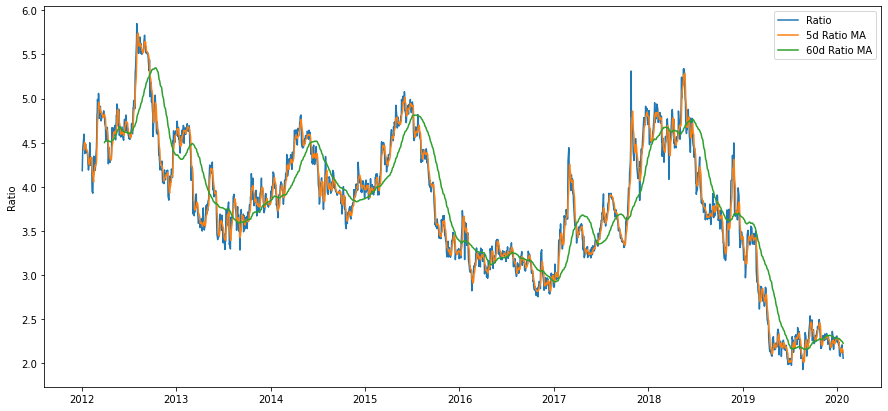

In [76]:

ratios_mavg5 = train.rolling(window=5, center=False).mean()

ratios_mavg60 = train.rolling(window=60, center=False).mean()

std_60 = train.rolling(window=60, center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15, 7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()


Graficquemos ahora el promedio móvil de los *z-scores*

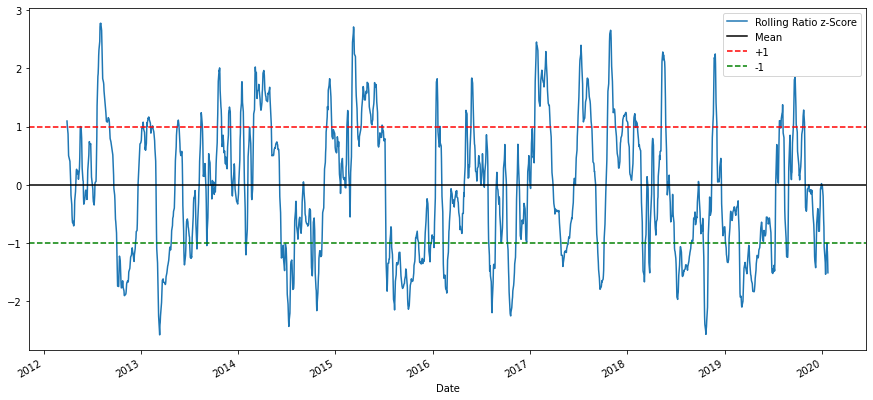

In [77]:
plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

### Creando el modelo

Tomando en cuenta la gráfica con el *z-score*, claramente se nota que si el *z-score* es muy alto, tiende a regresar.
Podemos usar los cocientes +1/-1 como límites de referencia, y crear un modelo para generar una señal de *trading*:
* Comprar (1) cuando el z-score es menor a -1 porque esperamos que el cociente incremente
* Vender (-1) cuando el z-score sea mayor a 1 porque esperaremos que el cociente disminuya 

### Entrenando y optimizando

¿Cómo funcionará el modelo sobre los datos actuales?

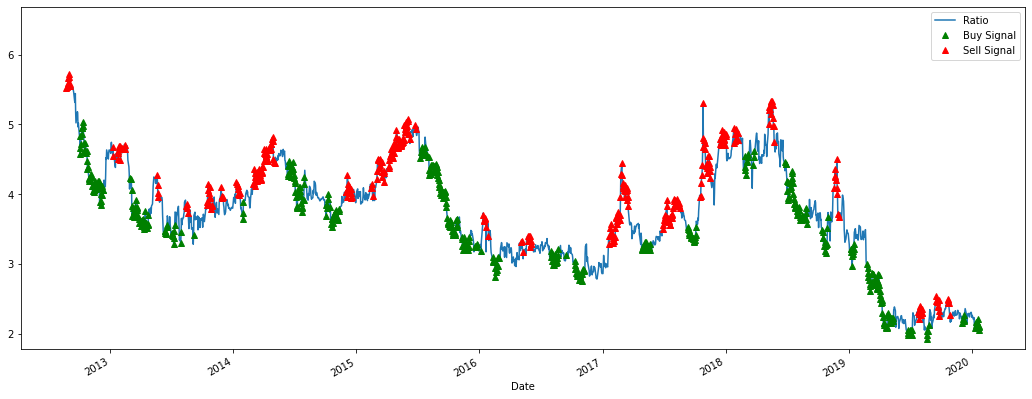

In [78]:

plt.figure(figsize=(18,7))

train[160:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()


Estas señales de *trading* son para los cocientes después del 2012
Estas son señales para los cocientes, pero ¿Qué pasa con las acciones?

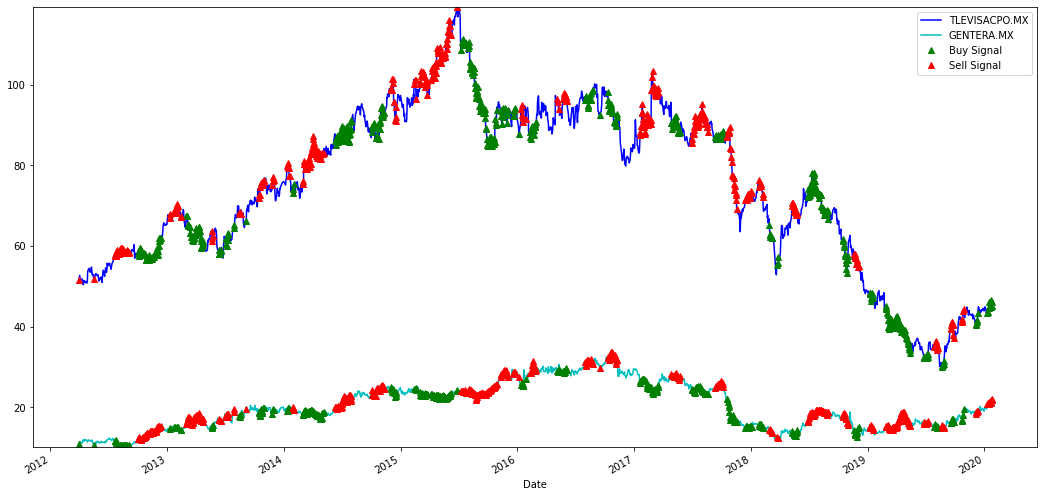

In [79]:
plt.figure(figsize=(18,9))
S1 = all_prices['TLEVISACPO.MX'].iloc[:2019]
S2 = all_prices['GENTERA.MX'].iloc[:2019]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))

plt.legend(['TLEVISACPO.MX', 'GENTERA.MX', 'Buy Signal', 'Sell Signal'])
plt.show()

Ahí se pueden ver las señales por acción

In [80]:


#Ejemplo de trading usando una estrategia simple
def trade(S1, S2, window1, window2):
    
    # Si la ventana es 0 no tiene sentido, salir
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Calcular promedio movil y desviación movil
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simula el trading
    # Empezar con cero posición ni dinero
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Vender o posición corta si el z-score > 1 
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Vender Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Posición larga, comprar si z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Comprar Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # vaciar posición si el z-score entre (-0.5,0.5)
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Salir pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money


In [81]:
trade(all_prices['TLEVISACPO.MX'].iloc[:2019], all_prices['GENTERA.MX'].iloc[:2019], 60, 5)

2514.7247713901615

### Backtest en el conjunto de prueba

Veamos qué pasa entre 2020 y 20222

In [82]:


trade(all_prices['TLEVISACPO.MX'].iloc[2019:], all_prices['GENTERA.MX'].iloc[2019:], 60, 5)


273.71433088356116


Parece que funciona, dada la pandemia, no está mal

** Areas de mejora y próximos pasos**
Obviamente no es la mejor estrategia, hay que jugar con más acciones para ver qué funciona mejor

* 1. Usar más acciones con mayor variación de tiempo
* 2. Hay que revisar los sobreajustes se pueden meter filtros de Kalman, y otros métodos
* 3. Meter métodos más avanzados como el exponente de Hurst, half-life de mean reversion, y filtros de Kalman 
